In [1]:
import random
import matplotlib.pyplot as plt

In [2]:
def generate_possible_solution(total_number_of_objects):
    possible_solution = []
    for i in range(0, total_number_of_objects):
        randomNumber = random.randint(0, 1)
        possible_solution.append(randomNumber)
    return possible_solution

In [3]:
def print_pop(pop):
    for i in range(len(pop)):
        print("individual ",i+1,":",pop[i])
    return ""    
        

In [4]:
def calculate_total_value_for_possible_solution(profit_list, items_picked_list, total_number_of_objects):
    total_value = 0
    for i in range(0, total_number_of_objects):
        if items_picked_list[i] == 1:
            total_value = total_value + profit_list[i]
    return total_value

In [5]:
def solution_already_present_in_population(population, possible_solution):
    for i in range(0, len(population)):
        curr_solution = population[i]
        areIdentical = True
        for j in range(0, len(curr_solution)):
            if(possible_solution[j] != curr_solution[j]):
                areIdentical = False
        if areIdentical == True:
            return True
    return False            
        

In [6]:
def can_knapsack_carry_selected_items(items_picked_list, weight_list, max_capacity_knapsack, total_number_of_objects):
    cumulative_weight_selected_items = 0
    
    for i in range(0, total_number_of_objects):
        if items_picked_list[i] == 1:
            cumulative_weight_selected_items += weight_list[i]    
    
    if cumulative_weight_selected_items > max_capacity_knapsack:
            return False    
    return True

In [7]:
def initial_population(population_size, weight_list, profit_list, max_capacity_knapsack):
    pop = []
    itera = 0
    number_of_objects = len(weight_list)
    while itera < population_size:
        new_possible_solution = generate_possible_solution(number_of_objects)
        if can_knapsack_carry_selected_items(new_possible_solution, weight_list, max_capacity_knapsack, number_of_objects):
            alreadyPresent = solution_already_present_in_population(pop, new_possible_solution)
            if not alreadyPresent:
                pop.append(new_possible_solution)
                itera += 1
    return pop

In [8]:
def highest_value_solution_in_population(population, profit_list):
    highest_value = 0
    highest_index = -1
    for i in range(0, len(population)):
        value_for_curr_soln = calculate_total_value_for_possible_solution(profit_list, population[i], len(population[i]))
        if value_for_curr_soln > highest_value:
            highest_value = value_for_curr_soln
            highest_index = i
    return highest_index, highest_value

In [9]:
def tournament_selection(population, profit_list):
    randomly_selected_1 = random.randint(0, len(population) - 1)
    randomly_selected_2 = random.randint(0, len(population) - 1)
    total_number_of_objects = len(population[randomly_selected_1])
    if calculate_total_value_for_possible_solution(profit_list, population[randomly_selected_1], total_number_of_objects) > calculate_total_value_for_possible_solution(profit_list, population[randomly_selected_2], total_number_of_objects):
        winner = population[randomly_selected_1]
    else:
        winner = population[randomly_selected_2]

    return winner

In [10]:
# one point crossover operation
def crossover_operator(parent_1, parent_2, weight_list, max_capacity_knapsack):
    crossover_point = random.randint(0, len(parent_1))
    
    left_part_from_parent1 = parent_1[:crossover_point]
    right_part_from_parent2 = parent_2[crossover_point:]
    
    
    child_from_crossover = left_part_from_parent1 + right_part_from_parent2
    
    if can_knapsack_carry_selected_items(child_from_crossover, weight_list, max_capacity_knapsack, len(parent_1)):
        return child_from_crossover
    else:
        return crossover_operator(parent_1, parent_2, weight_list, max_capacity_knapsack)

In [11]:
# one point mutation operation
def mutation_operator(child, weight_list, max_capacity_knapsack):
    child_after_mutation = child
    
    first_mutation_index, second_mutation_index = random.sample(range(0, len(child)), 2)
    
    child_after_mutation[first_mutation_index], child_after_mutation[second_mutation_index] = child_after_mutation[second_mutation_index], child_after_mutation[first_mutation_index]

    if can_knapsack_carry_selected_items(child_after_mutation, weight_list, max_capacity_knapsack, len(child_after_mutation)):
        return child_after_mutation
    else:
        return mutation_operator(child, weight_list, max_capacity_knapsack)

In [12]:
def producing_new_generation(curr_pop, mutation_rate, profit_list, weight_list, max_capacity_knapsack):
    new_generation = []
    for i in range(0, len(curr_pop)):
        parent_1 = tournament_selection(curr_pop, profit_list)
        parent_2 = tournament_selection(curr_pop, profit_list)
        child = crossover_operator(parent_1, parent_2, weight_list, max_capacity_knapsack)

        if random.random() < mutation_rate:
            child = mutation_operator(child, weight_list, max_capacity_knapsack)

        new_generation.append(child)
    return new_generation

In [13]:
def genetic_algorithm(max_capacity_knapsack, size_of_population, mutation_rate, weight_list, profit_list):
    best_solution_in_each_gen_list = []
    
    pop = initial_population(size_of_population,weight_list, profit_list, max_capacity_knapsack)
    print("initial population:")
    print(print_pop(pop))
    
    for i in range(0, 150):
        pop = producing_new_generation(pop, mutation_rate, profit_list, weight_list, max_capacity_knapsack)
        
        best_solution_idx, best_solution_value = highest_value_solution_in_population(pop, profit_list)
        
        best_solution_in_each_gen_list.append(best_solution_value)
    print("final population after final generation:")
    print(print_pop(pop))
    fitnessListOfFinalPopulation = []
    for individual in pop:
        fitnessListOfFinalPopulation.append(calculate_total_value_for_possible_solution(profit_list, individual, len(individual)))
    print("value list for final population:", fitnessListOfFinalPopulation)        
    
    return pop[best_solution_idx], best_solution_in_each_gen_list

weight list: [3, 13, 10, 9, 7, 1, 8, 8, 2, 9]
value list: [266, 442, 671, 526, 388, 245, 210, 145, 126, 322]
max capacity of knapsack 35
initial population:
individual  1 : [0, 0, 0, 0, 1, 1, 1, 0, 1, 0]
individual  2 : [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
individual  3 : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
individual  4 : [0, 0, 1, 0, 1, 0, 1, 1, 1, 0]
individual  5 : [0, 0, 1, 0, 0, 0, 0, 1, 0, 0]
individual  6 : [1, 1, 0, 0, 0, 1, 1, 0, 0, 1]
individual  7 : [0, 1, 0, 0, 0, 0, 1, 0, 1, 1]
individual  8 : [1, 1, 0, 1, 1, 1, 0, 0, 1, 0]
individual  9 : [1, 0, 0, 0, 1, 1, 0, 0, 1, 1]
individual  10 : [1, 1, 0, 0, 1, 0, 1, 0, 0, 0]

final population after final generation:
individual  1 : [1, 0, 1, 0, 1, 1, 1, 0, 1, 0]
individual  2 : [1, 0, 1, 1, 1, 1, 0, 0, 1, 0]
individual  3 : [1, 0, 1, 1, 1, 1, 0, 0, 1, 0]
individual  4 : [1, 0, 1, 1, 1, 1, 0, 0, 1, 0]
individual  5 : [1, 0, 1, 1, 1, 1, 0, 0, 1, 0]
individual  6 : [1, 0, 1, 1, 1, 1, 0, 0, 1, 0]
individual  7 : [1, 0, 1, 1, 1, 1, 0, 0, 1, 0]
i

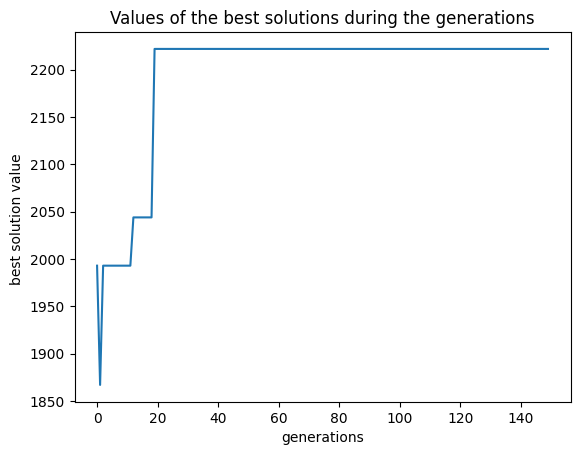

In [14]:
# latest population after genetic algorithm run
max_capacity_knapsack = 35
size_of_population = 10 
mutation_rate = 0.1
weight_list = [3, 13, 10,9,7,1,8,8,2,9]
profit_list = [266, 442, 671, 526, 388, 245, 210,145,126,322]
print("weight list:", weight_list)
print("value list:", profit_list)
print("max capacity of knapsack", max_capacity_knapsack)


items_to_be_picked, best_solution_in_each_gen_list = genetic_algorithm(max_capacity_knapsack,
                                       size_of_population,
                                       mutation_rate,
                                       weight_list,
                                       profit_list)

print("items to be picked", items_to_be_picked)
print("best solution value after last generation:", best_solution_in_each_gen_list[len(best_solution_in_each_gen_list) - 1])
# Plot a graph to show the progress
plt.plot(best_solution_in_each_gen_list)
plt.xlabel('generations')
plt.ylabel('best solution value ')
plt.title("Values of the best solutions during the generations")
plt.show()